# Kaggle Submissions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [2]:
df_train = pd.read_csv('./datasets/updated_train.csv')
df_test = pd.read_csv('./datasets/updated_test.csv')
Sale = (df_train['saleprice'])
test_id = df_test['id'].to_frame()

### Preprocessing

In [3]:
df_train.drop(columns = 'id', inplace = True)
df_test.drop(columns = 'id', inplace = True)

### Feature encoding --- one hot/label encoding

In [4]:
object_columns = list(df_train.select_dtypes(include = 'object').columns)
len(object_columns)

33

In [5]:
num_col = list(df_train.select_dtypes(exclude = 'object').columns)
len(num_col)

47

In [6]:
for col in object_columns:
    print(col, ':', df_train[col].nunique())

ms_zoning : 7
street : 2
land_contour : 4
utilities : 3
lot_config : 5
land_slope : 3
neighborhood : 28
condition_1 : 9
condition_2 : 8
bldg_type : 5
roof_style : 6
roof_matl : 6
exterior_1st : 15
exterior_2nd : 15
mas_vnr_type : 4
exter_qual : 4
exter_cond : 5
foundation : 6
bsmt_qual : 5
bsmt_cond : 5
bsmt_exposure : 4
bsmtfin_type_1 : 6
bsmtfin_type_2 : 6
heating : 5
heating_qc : 5
electrical : 5
kitchen_qual : 4
functional : 8
fireplace_qu : 5
garage_type : 6
garage_finish : 3
misc_feature : 5
sale_type : 9


In [7]:
dummy = pd.get_dummies(df_train[object_columns], prefix = object_columns)

In [8]:
dummy.head()

,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,...,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_train.drop(object_columns, axis = 1, inplace = True)
df_train.shape

(2051, 47)

In [10]:
df_train_final = pd.concat([df_train, dummy], axis = 1)
dummy.shape, df_train_final.shape

((2051, 216), (2051, 263))

In [11]:
dummy1 = pd.get_dummies(df_test[object_columns], prefix = object_columns)
dummy1.shape, dummy.shape
## Inconsisitent of columns
## Have to connect them 

((878, 200), (2051, 216))

In [12]:
df_train = pd.read_csv('./datasets/updated_train.csv')
df_test = pd.read_csv('./datasets/updated_test.csv')

In [13]:
df_train_test = pd.concat([df_train.drop('saleprice', axis =1) , df_test], axis = 0)
df_train_test.shape

(2929, 80)

In [14]:
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2929 non-null   int64  
 1   pid              2929 non-null   int64  
 2   ms_subclass      2929 non-null   int64  
 3   ms_zoning        2929 non-null   object 
 4   lot_frontage     2929 non-null   float64
 5   lot_area         2929 non-null   int64  
 6   street           2929 non-null   object 
 7   alley            2929 non-null   int64  
 8   lot_shape        2929 non-null   int64  
 9   land_contour     2929 non-null   object 
 10  utilities        2929 non-null   object 
 11  lot_config       2929 non-null   object 
 12  land_slope       2929 non-null   object 
 13  neighborhood     2929 non-null   object 
 14  condition_1      2929 non-null   object 
 15  condition_2      2929 non-null   object 
 16  bldg_type        2929 non-null   object 
 17  house_style    

In [15]:
df_train_test['bsmt_cond'].fillna(df_train_test['bsmt_cond'].mode()[0], inplace = True)
df_train_test['bsmt_qual'].fillna(df_train_test['bsmt_qual'].mode()[0], inplace = True)
df_train_test['bsmt_exposure'].fillna(df_train_test['bsmt_exposure'].mode()[0], inplace = True)
df_train_test['bsmtfin_type_1'].fillna(df_train_test['bsmtfin_type_1'].mode()[0], inplace = True)
df_train_test['bsmtfin_type_2'].fillna(df_train_test['bsmtfin_type_2'].mode()[0], inplace = True)
df_train_test['fireplace_qu'].fillna(df_train_test['fireplace_qu'].mode()[0], inplace = True)
df_train_test['garage_type'].fillna(df_train_test['garage_type'].mode()[0], inplace = True)
df_train_test['garage_finish'].fillna(df_train_test['garage_finish'].mode()[0], inplace = True)

In [16]:
dummy2 = pd.get_dummies(df_train_test[object_columns], prefix = object_columns)
dummy.shape, dummy1.shape, dummy2.shape

((2051, 216), (878, 200), (2929, 225))

In [17]:
df_train_test.drop(object_columns, axis = 1, inplace = True)
df_train_test.shape

(2929, 47)

In [18]:
df_train_test_final = pd.concat([df_train_test, dummy2], axis = 1)
df_train_test_final.shape

(2929, 272)

In [19]:
df_train_1 = df_train_test_final.iloc[0:2051]
df_test_1 = df_train_test_final.iloc[2051:]
df_train_1.shape, df_test_1.shape

((2051, 272), (878, 272))

In [20]:
y = (Sale)
X = df_train_1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Testing Score: {lr.score(X_test, y_test)}, Training Score: {lr.score(X_train, y_train)}')
predictions = lr.predict(X_test)

Testing Score: 0.9149422603172392, Training Score: 0.9446530207062369


In [22]:
mean_squared_error(y_test, predictions, squared = False), mean_squared_error(y_train, lr.predict(X_train), squared = False)

(22548.313206914394, 18830.146611952063)

The model is overfitted as the training score and training RMSE are performing way better than the testing score. 

In [23]:
coef_df = pd.DataFrame({
    'col_name': X.columns,
    'coef': lr.coef_
})
coef_df.sort_values(by = 'coef', ascending = True)

,col_name,coef
127,roof_matl_ClyTile,-610394.612417
257,misc_feature_Elev,-559843.291078
155,exterior_2nd_CBlock,-61386.299470
47,ms_zoning_A (agr),-58317.786416
261,misc_feature_TenC,-40310.803840
...,...,...
128,roof_matl_CompShg,94806.405946
81,neighborhood_GrnHill,102462.293387
133,roof_matl_WdShake,123646.281560
129,roof_matl_Membran,132176.796693


In [24]:
## Ridge Model
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr.score(Z_train, y_train)
ridge_alphas = np.logspace(0,3, 20)
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'r2', cv = 100)
ridge_cv.fit(Z_train, y_train)
print(f'Training Score: {ridge_cv.score(Z_train, y_train)}, Testing Score: {ridge_cv.score(Z_test, y_test)}')
ridge_preds = ridge_cv.predict(Z_test)
mean_squared_error(y_test, ridge_preds, squared = False), mean_squared_error(y_train, ridge_cv.predict(Z_train), squared = False)

Training Score: 0.9148306460960375, Testing Score: 0.9073678461654338


(23530.8719775734, 23358.686406767134)

In [25]:
ridge_cv.alpha_
## The optimal value is too large for the computer to run 

1000.0

The Ridge model perform worse in the rmse than the linear Regression. However, it has variance and bias trade-off. It is similar in value in both test and train score and rmse

In [26]:
# Lasso 
model = Lasso(alpha = 59).fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))
lasso_preds = model.predict(X_test)
mean_squared_error(y_test, lasso_preds, squared = False), mean_squared_error(y_train, model.predict(X_train), squared = False)

0.9343450186403408 0.9204166038964948


(21810.638217172545, 20508.81563960044)

Lasso Perform the best out of the Linear Regression and ridge, as it gives score of 92 on test and 21810 on the rmse. I choose Lasso because since the I had a lot of features that it will perform better. 

In [27]:
## Baseline RMSE
baseline_train_preds = [y_train.mean() for i in y_train]
baseline_test_preds = [y_train.mean() for i in y_test]
## Baseline RMSE for testing and training
mean_squared_error(y_true = y_test, y_pred= baseline_test_preds, squared = False),mean_squared_error(y_train, y_pred= baseline_train_preds, squared = False)


(77354.3252026887, 80039.93732744697)

All of the model beats the baseline model by a lot. Lasso performs the best with testing score of 93% and RMSE of 21728. Which beats the baseline by more than 50,000. 

In [28]:
prediction = pd.DataFrame({'Id': test_id['id'], 'SalePrice': model.predict(df_test_1)}).to_csv('datasets/test_prediction.csv', index = False)
prediction = pd.DataFrame({'wage': model.predict(df_test)})
prediction.head()

,Id,SalePrice
0,2658,143079.051945
1,2718,149430.601555
2,2414,217132.070282
3,1989,104842.398646
4,625,172255.631876


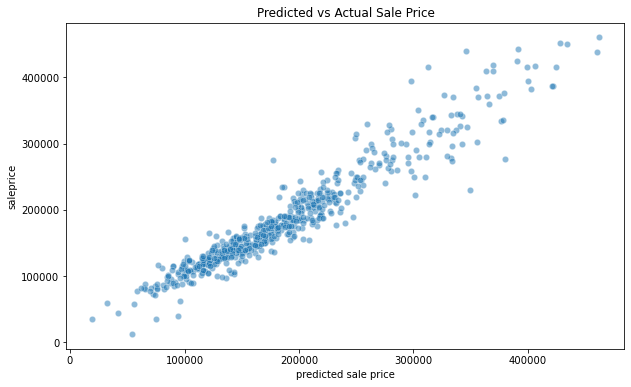

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = model.predict(X_test), y = y_test, s = 40, alpha = 0.5)
plt.xlabel('predicted sale price')
plt.title('Predicted vs Actual Sale Price');
plt.savefig('Images/Predicted_vs_Actual.png')